# Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0)

In [5]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

Perceptron(random_state=42)

In [8]:
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

# Multi Layer Perceptrons

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
housing = fetch_california_housing()

X_train_full, X_test, Y_train_full, Y_test = train_test_split(housing.data,housing.target, random_state=42)

In [12]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full,Y_train_full, random_state=42)

In [13]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state = 42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)

In [14]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [15]:
y_pred = pipeline.predict(X_valid)

In [16]:
rmse = mean_squared_error(Y_valid,y_pred, squared = False)

In [17]:
rmse

0.5053326657968529

# Building Image Classifeer using Sequential API

In [19]:
import tensorflow as tf

In [20]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [21]:
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist

In [22]:
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [23]:
x_train,y_train = x_train_full[:-5000], y_train_full[:-5000]
x_valid,y_valid = x_train_full[-5000:], y_train_full[-5000:]

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)


In [25]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [26]:
x_train, x_valid, x_test = x_train/255. , x_valid/255., x_test/255.

In [27]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
class_names = ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
class_names[y_train[0]]

'Ankle Boot'

In [34]:
# Creating the Model using Sequential API

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [61]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]),
                             tf.keras.layers.Dense(300, activation='relu'),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')])

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.layers

In [64]:
hidden_1 = model.layers[1]
hidden_1.name

'dense_8'

In [65]:
# GEtting weights and layer of a layer
weights, biases = hidden_1.get_weights()

In [66]:
weights.shape

(784, 300)

In [67]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics=['accuracy'])

In [68]:
history = model.fit(x_train,y_train, epochs=30, validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7263 - accuracy: 0.7630 - val_loss: 0.5123 - val_accuracy: 0.8240
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4889 - accuracy: 0.8294 - val_loss: 0.4589 - val_accuracy: 0.8330
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4421 - accuracy: 0.8445 - val_loss: 0.4287 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4169 - accuracy: 0.8537 - val_loss: 0.3962 - val_accuracy: 0.8578
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3957 - accuracy: 0.8609 - val_loss: 0.3915 - val_accuracy: 0.8584
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3789 - accuracy: 0.8662 - val_loss: 0.3942 - val_accuracy: 0.8612
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3666 - accuracy: 0.8698 - val_loss: 0.3744 - val_accuracy:

In [69]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

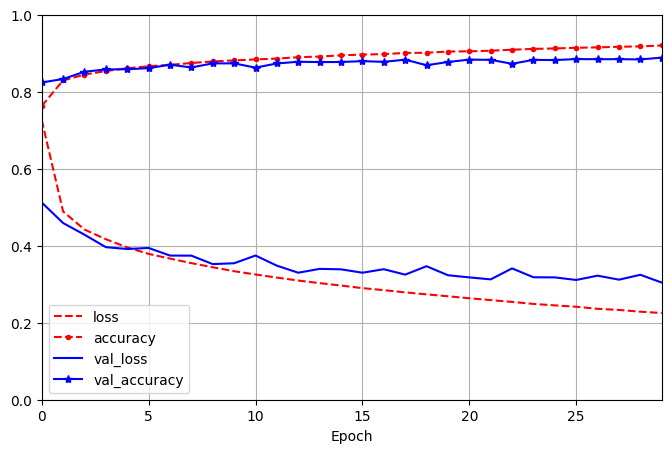

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0,29], ylim=[0, 1], grid = True, xlabel = 'Epoch',
                                  style = ['r--', 'r--.', 'b-', 'b-*'])
plt.show()

In [73]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3237 - accuracy: 0.8835


[0.3237483501434326, 0.8834999799728394]

In [77]:
X_new = x_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 29ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [82]:
y_pred = y_proba.argmax(axis=1)

In [83]:
y_pred

array([9, 2, 1], dtype=int64)

In [85]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U10')

In [86]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

# Bulding MLP Regressor using Sequential API

In [93]:
housing = fetch_california_housing()

X_train_full, X_test, Y_train_full, Y_test = train_test_split(housing.data,housing.target, random_state=42)

In [94]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full,Y_train_full, random_state=42)

In [95]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([norm_layer,
                            tf.keras.layers.Dense(50, activation='relu'),
                            tf.keras.layers.Dense(50, activation='relu'),
                            tf.keras.layers.Dense(50, activation='relu'),
                            tf.keras.layers.Dense(1)])

In [96]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics = ['RootMeanSquaredError'])
norm_layer.adapt(X_train)

In [98]:
history = model.fit(X_train,Y_train, epochs=20, validation_data=(X_valid,Y_valid))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 0.7992 - root_mean_squared_error: 0.8940 - val_loss: 0.3812 - val_root_mean_squared_error: 0.6174
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3740 - root_mean_squared_error: 0.6115 - val_loss: 3.2871 - val_root_mean_squared_error: 1.8130
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3710 - root_mean_squared_error: 0.6091 - val_loss: 0.4711 - val_root_mean_squared_error: 0.6864
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3363 - root_mean_squared_error: 0.5799 - val_loss: 1.7120 - val_root_mean_squared_error: 1.3084
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3249 - root_mean_squared_error: 0.5700 - val_loss: 3.2122 - val_root_mean_squared_error: 1.7923
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3457 - root_mean_squared_error: 0.5879 - val_loss: 1.4914 - val_

In [101]:
mse_test, rmse_test = model.evaluate(X_test, Y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 88ms/step


In [102]:
y_pred

array([[0.5566182],
       [1.175063 ],
       [5.0311046]], dtype=float32)

# Wide and Deep Layer Networks

In [104]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation = 'relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation = 'relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [105]:
input_ = tf.keras.layers.Input(shape = X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

In [110]:
model = tf.keras.Model(inputs=[input_], outputs = [output])

In [111]:
# Dividing the Feature 

input_wide = tf.keras.Input(shape = [5]) # Features from 0 to 4
input_deep = tf.keras.Input(shape = [6]) # features 2 to 7
norm_layer_deep = tf.keras.layers.Normalization()
norm_layer_wide = tf.keras.layers.Normalization()

In [112]:
norm_wide = norm_layer_wide(input_wide)
norm_Deep = norm_layer_deep(input_deep)

In [114]:
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_Deep)
hidden2 = tf.keras.layers.Dense(30 , activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide,hidden2])
output = tf.keras.layers.Dense(1)(concat)

In [116]:
model = tf.keras.Model(inputs=[input_wide,input_deep], outputs = [output])

In [117]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer = optimizer, metrics = ['RootMeanSquaredError'])

In [119]:
x_train_wide,x_train_deep = X_train[:,:5], X_train[:,2:]
x_valid_wide,x_valid_deep = X_valid[:,:5], X_valid[:,2:]
x_test_wide,x_test_deep = X_test[:,:5], X_test[:,2:]
x_new_wide,x_new_deep = x_test_wide[:3], x_test_deep[:3]

In [120]:
norm_layer_wide.adapt(x_train_wide)
norm_layer_deep.adapt(x_train_deep)

In [124]:
history = model.fit((x_train_wide,x_train_deep),Y_train, epochs=20, validation_data=((x_valid_wide,x_valid_deep),Y_valid))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.2869 - root_mean_squared_error: 1.1344 - val_loss: 0.8071 - val_root_mean_squared_error: 0.8984
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5037 - root_mean_squared_error: 0.7097 - val_loss: 0.5391 - val_root_mean_squared_error: 0.7342
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4356 - root_mean_squared_error: 0.6600 - val_loss: 0.3956 - val_root_mean_squared_error: 0.6290
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4104 - root_mean_squared_error: 0.6406 - val_loss: 0.4214 - val_root_mean_squared_error: 0.6491
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3976 - root_mean_squared_error: 0.6306 - val_loss: 0.3550 - val_root_mean_squared_error: 0.5958
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3752 - root_mean_squared_error: 0.6125 - val_loss: 0.3516 - val_

In [125]:
mse_test = model.evaluate((x_test_wide,x_test_deep))

162/162 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00


# Using SubClasses API to build Dynamic models.

In [128]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation = 'relu', **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_Wide = tf.keras.layers.Normalization()
        self.norm_layer_Deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    def call(self, inputs):
        input_wide , input_deep = inputs
        norm_wide = self.norm_layer_Wide(input_wide)
        norm_deep = self.norm_layer_Wide(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

In [131]:
model = WideAndDeepModel(30, activation='relu', name = "My_Cool_Model")

In [133]:
model.call(inputs=[input_wide,input_deep])

ValueError: Exception encountered when calling layer "normalization_7" (type Normalization).

Dimensions must be equal, but are 6 and 5 for '{{node normalization_7/sub}} = Sub[T=DT_FLOAT](Placeholder, normalization_7/sub/y)' with input shapes: [?,6], [1,5].

Call arguments received by layer "normalization_7" (type Normalization):
  • inputs=tf.Tensor(shape=(None, 6), dtype=float32)

In [130]:
model.save("my_keras_first_model", save_format='tf')

ValueError: Model <__main__.WideAndDeepModel object at 0x000002E58CE8F490> cannot be saved either because the input shape is not available or because the forward pass of the model is not defined.To define a forward pass, please override `Model.call()`. To specify an input shape, either call `build(input_shape)` directly, or call the model on actual data using `Model()`, `Model.fit()`, or `Model.predict()`. If you have a custom training step, please make sure to invoke the forward pass in train step through `Model.__call__`, i.e. `model(inputs)`, as opposed to `model.call()`.